In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
#import keras as k
from tensorflow import keras as k
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tqdm import tqdm

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"/content/drive/My Drive/AITS/archive/dataset_new/train",target_size=(224,224))
#tsdata = ImageDataGenerator()
#testdata = tsdata.flow_from_directory(directory=r"/content/drive/My Drive/AITS/archive/dataset_new/test", target_size=(224,224))

Found 2900 images belonging to 5 classes.


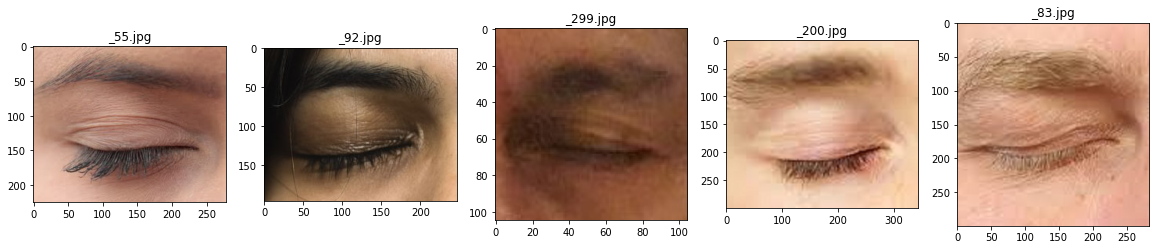

In [ ]:
plt.figure(figsize=(20,20))
img_folder=r'/content/drive/My Drive/AITS/archive/dataset_new/train/Closed'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'/content/drive/My Drive/AITS/archive/dataset_new/train'

In [ ]:
img_data_array = np.load('/content/drive/My Drive/AITS/archive/dataset_new/train/data.npy')

In [ ]:
type(img_data_array)

numpy.ndarray

In [ ]:
def create_dataset(img_folder):
   
    img_data_array = []
    class_name = []
    #img_data_array = img_data_array.tolist()
    #class_name = class_name.tolist()
   
    for dir1 in tqdm(os.listdir(img_folder)):
        for file in (os.listdir(os.path.join(img_folder, dir1))):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name


In [ ]:
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/drive/My Drive/AITS/archive/dataset_new/train')

100%|██████████| 5/5 [00:30<00:00,  6.16s/it]


In [ ]:
img_data

In [ ]:
len(class_name)

2900

In [ ]:
len(img_data)

2900

In [ ]:
np.save('/content/drive/My Drive/AITS/archive/dataset_new/train' + "/data", np.array(img_data))
np.save('/content/drive/My Drive/AITS/archive/dataset_new/train' + "/labels", np.array(class_name))

In [ ]:
img_data = (np.load('/content/drive/My Drive/AITS/archive/dataset_new/train/data.npy'))
labels = (np.load('/content/drive/My Drive/AITS/archive/dataset_new/train/labels.npy'))

In [ ]:
img_data

array([[[[0.4862745 , 0.56078434, 0.6901961 ],
         [0.49019608, 0.5647059 , 0.69411767],
         [0.49411765, 0.57254905, 0.69803923],
         ...,
         [0.40392157, 0.4509804 , 0.45882353],
         [0.39215687, 0.4392157 , 0.44705883],
         [0.38431373, 0.42745098, 0.43137255]],

        [[0.48235294, 0.5568628 , 0.6862745 ],
         [0.47843137, 0.56078434, 0.6862745 ],
         [0.48235294, 0.5647059 , 0.6901961 ],
         ...,
         [0.40392157, 0.4509804 , 0.45882353],
         [0.39215687, 0.4392157 , 0.44705883],
         [0.3882353 , 0.43137255, 0.43529412]],

        [[0.4745098 , 0.5529412 , 0.68235296],
         [0.47843137, 0.56078434, 0.6862745 ],
         [0.4745098 , 0.56078434, 0.6862745 ],
         ...,
         [0.40392157, 0.4509804 , 0.45882353],
         [0.39215687, 0.4392157 , 0.44705883],
         [0.3882353 , 0.43137255, 0.43529412]],

        ...,

        [[0.5568628 , 0.6392157 , 0.7647059 ],
         [0.5568628 , 0.6392157 , 0.7647059 ]

In [ ]:
np.unique(labels)

array(['Closed', 'Open', 'no_yawn', 'yawn'], dtype='<U7')

In [ ]:
lables_dict = {k: v for v, k in enumerate(np.unique(labels))}
lables_dict

{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}

In [ ]:
labels = [lables_dict[labels[i]] for i in range(len(labels))]

In [ ]:
labels

In [ ]:
k.utils.to_categorical(labels, num_classes=4)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def splitDataTrainValidTest(trainPercent, valPercent):
    """Split data into train, test, validation sets"""
    #global trainX, valX, testX, trainY, valY, testY
    trainX, valX, trainY, valY = train_test_split(img_data, labels, test_size=(100 - trainPercent) / 100, random_state=42)
    testPercent = 100 - (trainPercent + valPercent)
    valX, testX, valY, testY = train_test_split(valX, valY, test_size=testPercent / (valPercent + testPercent),
                                                random_state=42)
    return trainX, valX, testX, trainY, valY, testY

In [ ]:
trainX, valX, testX, trainY, valY, testY = splitDataTrainValidTest(80, 10)

In [ ]:
MODEL_PATH = '/content/drive/My Drive/AITS/archive/Support/'

In [ ]:
convLayers = [(32, 3, 'relu'),
              (64, 3, 'relu'),
              (128, 3, 'relu'),
              ]

denseLayers = [(20, 'relu'),
               (4, 'softmax')
                ]


In [ ]:
img_data.shape

(2900, 200, 200, 3)

In [ ]:
trainX.shape

(2320, 200, 200, 3)

In [ ]:
def trainCnnNetwork(trainX, trainY, valX, valY):
    trainY = k.utils.to_categorical(trainY, num_classes=4)
    valY = k.utils.to_categorical(valY, num_classes=4)
    # Model Setup
    model = Sequential()
    model.add(k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
    model.add(k.layers.MaxPooling2D((2, 2)))
    model.add(k.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(k.layers.MaxPooling2D((2, 2)))
    model.add(k.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(k.layers.Flatten())
    model.add(k.layers.Dense(20, activation='relu'))
    model.add(k.layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Model Training
    history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=10, batch_size=100)
    # Print model summary
    print(model.summary())
    print(history.history.keys())
    # Storing Model
    #i=1
    return history, model
    #model.save(storagePath+'model2.h5', overwrite=True, include_optimizer=True)


In [ ]:
history, model = trainCnnNetwork(trainX, trainY, valX, valY)

Epoch 1/10
24/24 [==============================] - 133s 6s/step - loss: 1.0423 - accuracy: 0.5306 - val_loss: 0.7504 - val_accuracy: 0.7414
Epoch 2/10
24/24 [==============================] - 132s 6s/step - loss: 0.4400 - accuracy: 0.7935 - val_loss: 0.4024 - val_accuracy: 0.7828
Epoch 3/10
24/24 [==============================] - 133s 6s/step - loss: 0.3309 - accuracy: 0.8414 - val_loss: 0.3572 - val_accuracy: 0.8276
Epoch 4/10
24/24 [==============================] - 133s 6s/step - loss: 0.2410 - accuracy: 0.8961 - val_loss: 0.2672 - val_accuracy: 0.8966
Epoch 5/10
24/24 [==============================] - 133s 6s/step - loss: 0.1661 - accuracy: 0.9319 - val_loss: 0.2233 - val_accuracy: 0.9276
Epoch 6/10
24/24 [==============================] - 133s 6s/step - loss: 0.1412 - accuracy: 0.9414 - val_loss: 0.2288 - val_accuracy: 0.9000
Epoch 7/10
24/24 [==============================] - 135s 6s/step - loss: 0.1275 - accuracy: 0.9591 - val_loss: 0.2547 - val_accuracy: 0.9138
Epoch 8/10
24

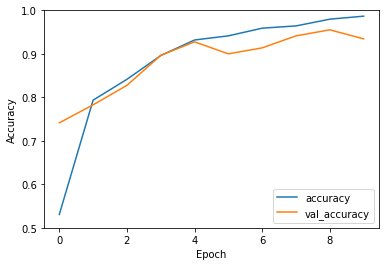

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
model.save('/content/drive/My Drive/AITS/archive/Support/model1.h5', overwrite=True, include_optimizer=True)

In [ ]:
import sklearn.metrics as m

In [ ]:
categorical = model.predict(testX)
predictions = np.argmax(categorical, axis=1)

In [ ]:
predictions

array([0, 2, 2, 0, 1, 3, 2, 0, 0, 0, 3, 1, 3, 2, 3, 0, 0, 2, 2, 0, 1, 2,
       0, 1, 1, 3, 3, 3, 3, 2, 2, 1, 3, 0, 3, 3, 0, 1, 2, 1, 3, 3, 2, 1,
       3, 1, 1, 3, 0, 0, 2, 0, 1, 2, 2, 0, 3, 2, 2, 0, 2, 1, 3, 2, 2, 1,
       0, 1, 1, 3, 3, 0, 3, 0, 3, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0, 2, 1, 3, 0, 2, 3, 2, 1, 3,
       1, 1, 2, 3, 1, 3, 1, 2, 0, 3, 1, 0, 0, 1, 1, 2, 3, 0, 3, 3, 1, 0,
       3, 3, 3, 3, 0, 2, 3, 0, 3, 0, 2, 2, 1, 3, 1, 1, 2, 2, 0, 2, 0, 3,
       3, 2, 1, 0, 0, 3, 3, 0, 3, 2, 3, 2, 3, 0, 0, 0, 0, 2, 3, 1, 0, 1,
       3, 1, 2, 0, 3, 3, 3, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 3,
       0, 0, 3, 0, 3, 3, 2, 1, 3, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 0, 2, 2,
       1, 1, 1, 1, 1, 2, 3, 2, 3, 0, 1, 0, 3, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 3, 3, 1, 0, 1, 0, 1, 1, 1, 0, 3, 0, 2, 3, 1, 1, 3, 3, 2, 1, 1,
       3, 1, 3, 1, 1, 2, 3, 2, 3, 0, 1, 2, 3, 3, 2, 0, 3, 1, 3, 3, 1, 3,
       1, 0, 2, 1])

In [ ]:
testY = k.utils.to_categorical(testY)

In [ ]:
testY[testY == 2]

array([], dtype=float32)

In [ ]:
def predictArrayLabels(data, model):
    categorical = model.predict(data)
    predictions = np.argmax(categorical, axis=1)
    return True, predictions

In [ ]:
def predictTestLabels():
    """Evaluates performance on test data"""
    predictions = predictArrayLabels(testX, model)
    if predictions[0]:
        predictions = predictions[1]
        expected = testY.flatten()
        print("Accuracy:", m.accuracy_score(expected, predictions))
        print("Confusion Matrix:\n", m.confusion_matrix(expected, predictions))

In [ ]:
predictTestLabels()

Accuracy: 0.9344827586206896
Confusion Matrix:
 [[66  6  0  0]
 [ 1 67  0  0]
 [ 0  0 68 10]
 [ 0  0  2 70]]


In [ ]:
testY = k.utils.to_categorical(testY, num_classes=4)

In [ ]:
model.evaluate(testX, testY)

10/10 [==============================] - 4s 413ms/step - loss: 0.1417 - accuracy: 0.9345


[0.1416706144809723, 0.934482753276825]

In [ ]:
predY = model.predict(testX)

In [ ]:
testY[1]

array([0., 0., 1., 0.], dtype=float32)

In [ ]:
predY[1]

array([3.5237892e-11, 6.1543426e-07, 9.0939778e-01, 9.0601608e-02],
      dtype=float32)

In [ ]:
class_labels = list(lables_dict.keys())
class_labels

['Closed', 'Open', 'no_yawn', 'yawn']

In [ ]:
for i in range(len(predY)):
    m = max(predY[i])
    j = np.where(predY[i] == m)[0][0]
    k = np.where(testY[i] == 1)[0][0]
    if(j!=k):
        print("------- Mismatch -------")
    print("Actual: " + class_labels[k] + "\nPredicted: " + class_labels[j] + "\nConfidence: " + str(m) + "\n")

Actual: Closed
Predicted: Closed
Confidence: 0.9999982

Actual: no_yawn
Predicted: no_yawn
Confidence: 0.9093978

Actual: no_yawn
Predicted: no_yawn
Confidence: 0.9699037

Actual: Closed
Predicted: Closed
Confidence: 0.99752325

Actual: Open
Predicted: Open
Confidence: 0.99990416

Actual: yawn
Predicted: yawn
Confidence: 0.9994449

Actual: no_yawn
Predicted: no_yawn
Confidence: 0.8156384

Actual: Closed
Predicted: Closed
Confidence: 0.99012613

Actual: Closed
Predicted: Closed
Confidence: 0.96529573

Actual: Closed
Predicted: Closed
Confidence: 0.99998844

Actual: yawn
Predicted: yawn
Confidence: 0.9963058

Actual: Open
Predicted: Open
Confidence: 0.92874515

Actual: yawn
Predicted: yawn
Confidence: 0.9835594

Actual: no_yawn
Predicted: no_yawn
Confidence: 0.8483718

Actual: yawn
Predicted: yawn
Confidence: 1.0

Actual: Closed
Predicted: Closed
Confidence: 0.99970764

Actual: Closed
Predicted: Closed
Confidence: 0.99753016

Actual: no_yawn
Predicted: no_yawn
Confidence: 0.8796325

Actu

In [ ]:
CLASSIFIER_PATH = '/content/drive/My Drive/AITS/Assets/lbpcascade_frontalface_improved.xml'

In [ ]:
def detectFace(image, isColor=True):
    """Detects all faces in an image"""
    if os.path.exists(CLASSIFIER_PATH):
        if isColor:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        detector = cv2.CascadeClassifier(CLASSIFIER_PATH)
        coordinates = detector.detectMultiScale(image, 1.1, 2)
        for i in range(0, len(coordinates)):
            w = coordinates[i][2]
            h = coordinates[i][3]
            x = coordinates[i][0]
            y = coordinates[i][1]
            extraw = int(w * 1 / 10)
            extrah = int(h * 1 / 10)
            if (x - extraw >= 0 and y - extrah >= 0 and x + w + extraw < image.shape[1] and y + h + extrah < image.shape[0]):
                coordinates[i][0] = coordinates[i][0] - extraw
                coordinates[i][1] = coordinates[i][1] - extrah
                coordinates[i][2] = coordinates[i][2] + 2 * extraw
                coordinates[i][3] = coordinates[i][3] + 2 * extrah
        if isColor:
            return coordinates, image
        return coordinates
    else:
        print("Invalid path " + CLASSIFIER_PATH)
        return [], []

In [ ]:
y

array([0., 0., 0., ..., 3., 3., 3.], dtype=float32)